# Final Project _Part2
# Group ONE

|**Title** |**Description** |
|:-- |:-- |
|**College** |Zekelman School of Buiness & Information Technology, St. Clair College |
|**Program** |Data Analytics for Business |
|**Course** |Healthcare Analytics (DAB304) |
|**Semester** |Fall 2022 |
|**Section** |03 |
|**Professor** |Mahmoud Artima |
|**Group No.** |ONE |
|**Team Members** |Maryam Aliakbari (0780763) , Farzin valiloo (0780765) |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
import plotly.express as px

In [2]:
states = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'District of Columbia','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas',
    'Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
    'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
    'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
    'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington',
    'West Virginia','Wisconsin','Wyoming'
]

causes = ['All Cause','Natural Cause','Septicemia (A40-A41)','Malignant neoplasms (C00-C97)',
    'Diabetes mellitus (E10-E14)','Alzheimer disease (G30)','Influenza and pneumonia (J09-J18)',
    'Chronic lower respiratory diseases (J40-J47)',
    'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
    'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
    'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
    'Diseases of heart (I00-I09,I11,I13,I20-I51)','Cerebrovascular diseases (I60-I69)',
    'COVID-19 (U071, Multiple Cause of Death)','COVID-19 (U071, Underlying Cause of Death)']

In [3]:
# Read the file  from previous part

d_Cause_ratios = pd.read_csv('death_causes_population_ratios.csv')

In [4]:
d_Cause_ratios.head()

Unnamed: 0 Jurisdiction of Occurrence  MMWR Year  All Cause  Natural Cause  \
0           0                    Alabama       2014   0.010374       0.009622   
1           1                    Alabama       2015   0.010441       0.009647   
2           2                    Alabama       2016   0.010513       0.009665   
3           3                    Alabama       2017   0.010695       0.009825   
4           4                    Alabama       2018   0.010873       0.010036   

   Septicemia (A40-A41)  Malignant neoplasms (C00-C97)  \
0              0.000213                       0.002116   
1              0.000210                       0.002076   
2              0.000204                       0.002090   
3              0.000206                       0.002083   
4              0.000205                       0.002124   

   Diabetes mellitus (E10-E14)  Alzheimer disease (G30)  \
0                     0.000264                 0.000386   
1                     0.000248                 0.000459   
2                     0.000236                 0.000500   
3                     0.000232                 0.000515   
4                     0.000232                 0.000525   

   Influenza and pneumonia (J09-J18)  \
0                           0.000207   
1                           0.000212   
2                           0.000192   
3                           0.000236   
4                           0.000253   

   Chronic lower respiratory diseases (J40-J47)  \
0                                      0.000634   
1                                      0.000663   
2                                      0.000666   
3                                      0.000698   
4                                      0.000723   

   Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
0                                           0.000165                    
1                                           0.000177                    
2                                           0.000177                    
3                                           0.000193                    
4                                           0.000188                    

   Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
0                                           0.000203                       
1                                           0.000205                       
2                                           0.000201                       
3                                           0.000192                       
4                                           0.000206                       

   Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  \
0                                           0.000257                                                   
1                                           0.000237                                                   
2                                           0.000241                                                   
3                                           0.000227                                                   
4                                           0.000198                                                   

   Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0                                     0.002588   
1                                     0.002627   
2                                     0.002582   
3                                     0.002648   
4                                     0.002718   

   Cerebrovascular diseases (I60-I69)  \
0                            0.000543   
1                            0.000589   
2                            0.000585   
3                            0.000584   
4                            0.000609   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3      

In [5]:
# An overall correlation matrix for different causes
corr = d_Cause_ratios[causes].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
#setting background
sns.set(style = 'white', font_scale =2)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

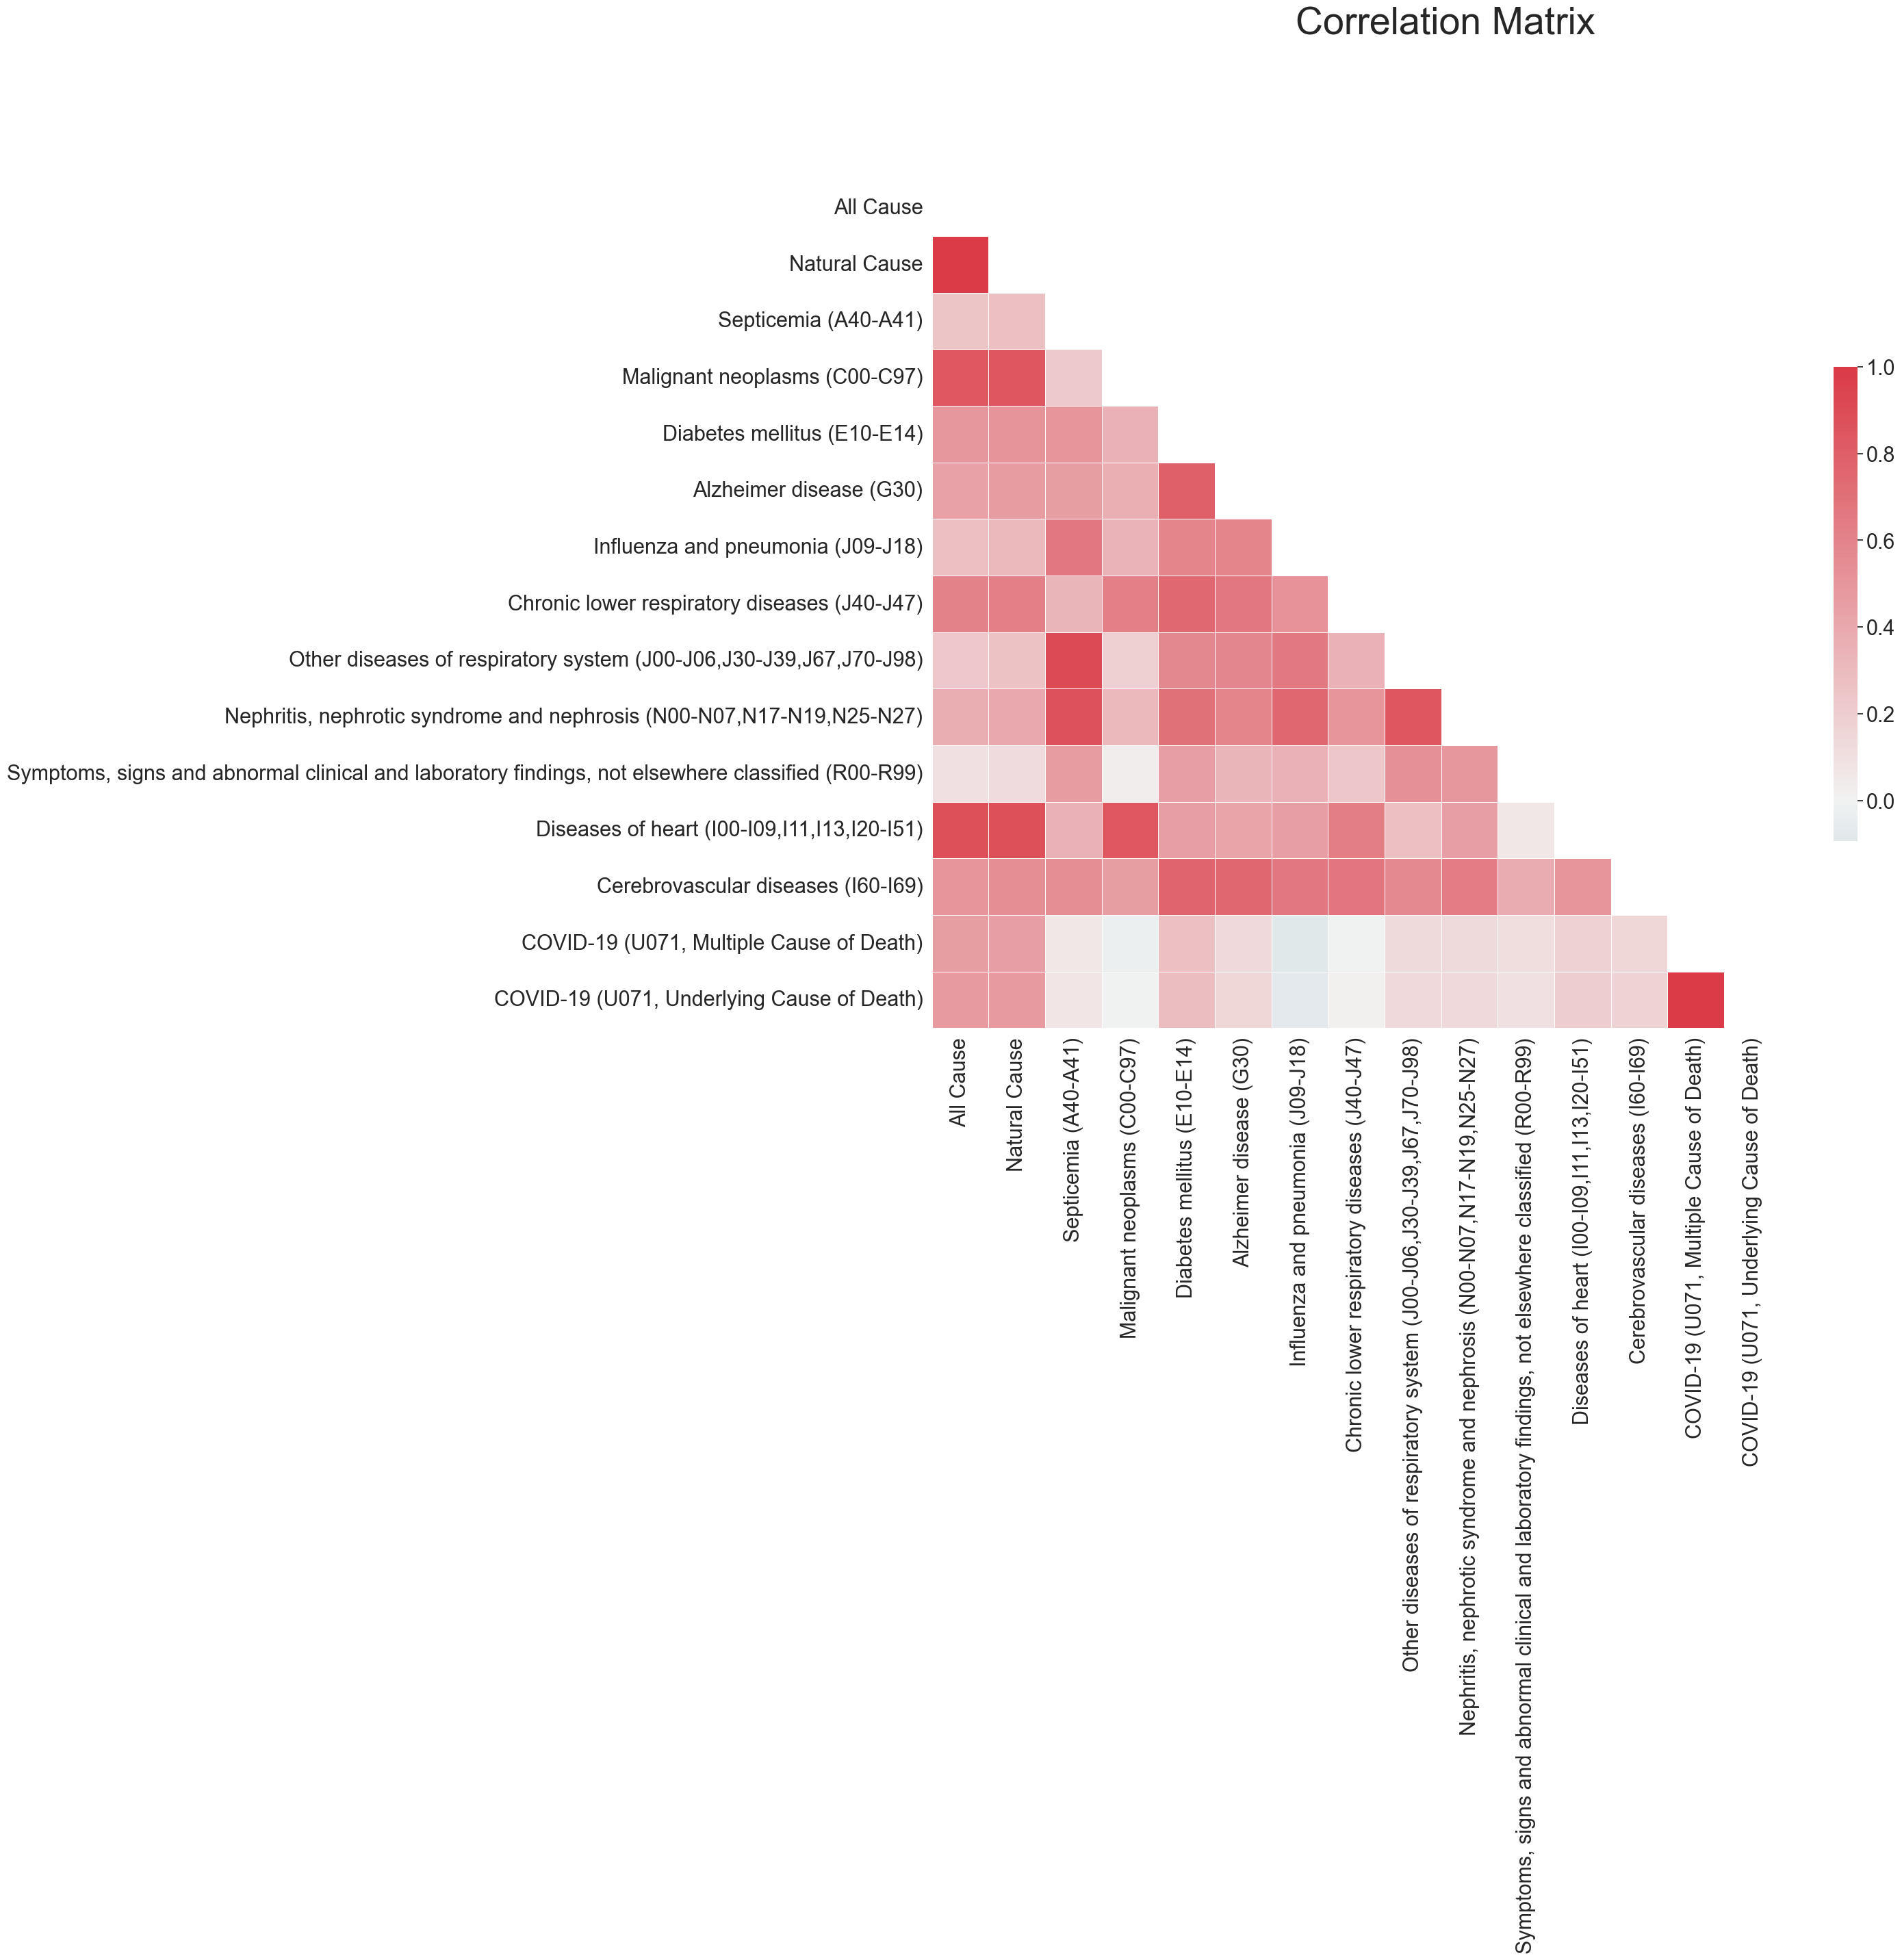

In [6]:
# Visualisation of correlation matrix
f, ax = plt.subplots(figsize=(20, 18))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [7]:
# Creating a dataset for death rate ratios for years before 2020

d_Cause_ratios_2019 = d_Cause_ratios[d_Cause_ratios['MMWR Year']<2020] 

d_Cause_ratios_2019.head(7)

Unnamed: 0 Jurisdiction of Occurrence  MMWR Year  All Cause  Natural Cause  \
0           0                    Alabama       2014   0.010374       0.009622   
1           1                    Alabama       2015   0.010441       0.009647   
2           2                    Alabama       2016   0.010513       0.009665   
3           3                    Alabama       2017   0.010695       0.009825   
4           4                    Alabama       2018   0.010873       0.010036   
5           5                    Alabama       2019   0.010821       0.009962   
9           9                     Alaska       2014   0.005543       0.004675   

   Septicemia (A40-A41)  Malignant neoplasms (C00-C97)  \
0              0.000213                       0.002116   
1              0.000210                       0.002076   
2              0.000204                       0.002090   
3              0.000206                       0.002083   
4              0.000205                       0.002124   
5              0.000208                       0.002046   
9              0.000000                       0.001232   

   Diabetes mellitus (E10-E14)  Alzheimer disease (G30)  \
0                     0.000264                 0.000386   
1                     0.000248                 0.000459   
2                     0.000236                 0.000500   
3                     0.000232                 0.000515   
4                     0.000232                 0.000525   
5                     0.000244                 0.000532   
9                     0.000000                 0.000000   

   Influenza and pneumonia (J09-J18)  \
0                           0.000207   
1                           0.000212   
2                           0.000192   
3                           0.000236   
4                           0.000253   
5                           0.000196   
9                           0.000000   

   Chronic lower respiratory diseases (J40-J47)  \
0                                      0.000634   
1                                      0.000663   
2                                      0.000666   
3                                      0.000698   
4                                      0.000723   
5                                      0.000705   
9                                      0.000000   

   Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
0                                           0.000165                    
1                                           0.000177                    
2                                           0.000177                    
3                                           0.000193                    
4                                           0.000188                    
5                                           0.000182                    
9                                           0.000000                    

   Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
0                                           0.000203                       
1                                           0.000205                       
2                                           0.000201                       
3                                           0.000192                       
4                                           0.000206                       
5                                           0.000200                       
9                                           0.000000                       

   Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  \
0                                           0.000257                                                   
1                                           0.000237                                                   
2                                           0.000241                                                   
3                                           0.000227                        

In [8]:
# Calculating the mean of death cause ratio for 2014 - 2019

d_Cause_ratios_2019 = d_Cause_ratios_2019.groupby(['Jurisdiction of Occurrence'])[causes].mean().reset_index()
d_Cause_ratios_2019.head()


Jurisdiction of Occurrence  All Cause  Natural Cause  Septicemia (A40-A41)  \
0                    Alabama   0.010619       0.009793              0.000208   
1                     Alaska   0.005791       0.004825              0.000000   
2                    Arizona   0.008131       0.007279              0.000028   
3                   Arkansas   0.010454       0.009648              0.000083   
4                 California   0.006695       0.006179              0.000038   

   Malignant neoplasms (C00-C97)  Diabetes mellitus (E10-E14)  \
0                       0.002089                     0.000243   
1                       0.001232                     0.000000   
2                       0.001720                     0.000294   
3                       0.002158                     0.000340   
4                       0.001522                     0.000234   

   Alzheimer disease (G30)  Influenza and pneumonia (J09-J18)  \
0                 0.000486                           0.000216   
1                 0.000000                           0.000000   
2                 0.000422                           0.000119   
3                 0.000472                           0.000176   
4                 0.000395                           0.000157   

   Chronic lower respiratory diseases (J40-J47)  \
0                                      0.000682   
1                                      0.000012   
2                                      0.000532   
3                                      0.000765   
4                                      0.000344   

   Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
0                                           0.000180                    
1                                           0.000000                    
2                                           0.000091                    
3                                           0.000049                    
4                                           0.000071                    

   Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
0                                           0.000201                       
1                                           0.000000                       
2                                           0.000053                       
3                                           0.000203                       
4                                           0.000094                       

   Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  \
0                                           0.000227                                                   
1                                           0.000000                                                   
2                                           0.000174                                                   
3                                           0.000022                                                   
4                                           0.000035                                                   

   Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0                                     0.002645   
1                                     0.001067   
2                                     0.001726   
3                                     0.002661   
4                                     0.001568   

   Cerebrovascular diseases (I60-I69)  \
0                            0.000588   
1                            0.000005   
2                            0.000372   
3                            0.000510   
4                            0.000400   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   COVID-19 (U071, Underlying Cause of Death)  
0                               

In [9]:
# Dropping "All Cause" and "Natural Cause" columns
d_Cause_ratios_2019.drop(
    columns=["All Cause","Natural Cause"], inplace=True)
d_Cause_ratios_2019.head(10)

Jurisdiction of Occurrence  Septicemia (A40-A41)  \
0                    Alabama              0.000208   
1                     Alaska              0.000000   
2                    Arizona              0.000028   
3                   Arkansas              0.000083   
4                 California              0.000038   
5                   Colorado              0.000048   
6                Connecticut              0.000135   
7                   Delaware              0.000000   
8       District of Columbia              0.000000   
9                    Florida              0.000117   

   Malignant neoplasms (C00-C97)  Diabetes mellitus (E10-E14)  \
0                       0.002089                     0.000243   
1                       0.001232                     0.000000   
2                       0.001720                     0.000294   
3                       0.002158                     0.000340   
4                       0.001522                     0.000234   
5                       0.001406                     0.000170   
6                       0.001862                     0.000177   
7                       0.002154                     0.000011   
8                       0.001878                     0.000003   
9                       0.002137                     0.000283   

   Alzheimer disease (G30)  Influenza and pneumonia (J09-J18)  \
0                 0.000486                           0.000216   
1                 0.000000                           0.000000   
2                 0.000422                           0.000119   
3                 0.000472                           0.000176   
4                 0.000395                           0.000157   
5                 0.000307                           0.000080   
6                 0.000277                           0.000144   
7                 0.000088                           0.000012   
8                 0.000000                           0.000002   
9                 0.000323                           0.000138   

   Chronic lower respiratory diseases (J40-J47)  \
0                                      0.000682   
1                                      0.000012   
2                                      0.000532   
3                                      0.000765   
4                                      0.000344   
5                                      0.000462   
6                                      0.000396   
7                                      0.000336   
8                                      0.000000   
9                                      0.000581   

   Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
0                                           0.000180                    
1                                           0.000000                    
2                                           0.000091                    
3                                           0.000049                    
4                                           0.000071                    
5                                           0.000073                    
6                                           0.000109                    
7                                           0.000000                    
8                                           0.000000                    
9                                           0.000124                    

   Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
0                                           0.000201                       
1                                           0.000000                       
2                                           0.000053                       
3                                           0.000203                       
4                                           0.000094                       
5                                           0.000052                       
6                                           0.000132                       
7

In [10]:
d_Cause_ratios_2019_2 = d_Cause_ratios_2019.set_index('Jurisdiction of Occurrence')
d_Cause_ratios_2019_2.head()

Septicemia (A40-A41)  \
Jurisdiction of Occurrence                         
Alabama                                 0.000208   
Alaska                                  0.000000   
Arizona                                 0.000028   
Arkansas                                0.000083   
California                              0.000038   

                            Malignant neoplasms (C00-C97)  \
Jurisdiction of Occurrence                                  
Alabama                                          0.002089   
Alaska                                           0.001232   
Arizona                                          0.001720   
Arkansas                                         0.002158   
California                                       0.001522   

                            Diabetes mellitus (E10-E14)  \
Jurisdiction of Occurrence                                
Alabama                                        0.000243   
Alaska                                         0.000000   
Arizona                                        0.000294   
Arkansas                                       0.000340   
California                                     0.000234   

                            Alzheimer disease (G30)  \
Jurisdiction of Occurrence                            
Alabama                                    0.000486   
Alaska                                     0.000000   
Arizona                                    0.000422   
Arkansas                                   0.000472   
California                                 0.000395   

                            Influenza and pneumonia (J09-J18)  \
Jurisdiction of Occurrence                                      
Alabama                                              0.000216   
Alaska                                               0.000000   
Arizona                                              0.000119   
Arkansas                                             0.000176   
California                                           0.000157   

                            Chronic lower respiratory diseases (J40-J47)  \
Jurisdiction of Occurrence                                                 
Alabama                                                         0.000682   
Alaska                                                          0.000012   
Arizona                                                         0.000532   
Arkansas                                                        0.000765   
California                                                      0.000344   

                            Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
Jurisdiction of Occurrence                                                                       
Alabama                                                              0.000180                    
Alaska                                                               0.000000                    
Arizona                                                              0.000091                    
Arkansas                                                             0.000049                    
California                                                           0.000071                    

                            Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
Jurisdiction of Occurrence                                                                          
Alabama                                                              0.000201                       
Alaska                                                               0.000000                       
Arizona                                                              0.000053                       
Arkansas                                                             0.000203                       
California                                                           0.000094                       

                            Symptoms, signs and abn

In [11]:
#finding top 5 death causes in each state

nlargest = 5

dc_ratios = np.argsort(-d_Cause_ratios_2019_2.values, axis=1)[:, :nlargest]

top_n_dc = d_Cause_ratios_2019_2.columns[dc_ratios].tolist()[0:51]

top_n_dc

C:\Users\meali\AppData\Local\Temp\ipykernel_2152\1604118016.py:7: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[['Diseases of heart (I00-I09,I11,I13,I20-I51)',
  'Malignant neoplasms (C00-C97)',
  'Chronic lower respiratory diseases (J40-J47)',
  'Cerebrovascular diseases (I60-I69)',
  'Alzheimer disease (G30)'],
 ['Malignant neoplasms (C00-C97)',
  'Diseases of heart (I00-I09,I11,I13,I20-I51)',
  'Chronic lower respiratory diseases (J40-J47)',
  'Cerebrovascular diseases (I60-I69)',
  'Septicemia (A40-A41)'],
 ['Diseases of heart (I00-I09,I11,I13,I20-I51)',
  'Malignant neoplasms (C00-C97)',
  'Chronic lower respiratory diseases (J40-J47)',
  'Alzheimer disease (G30)',
  'Cerebrovascular diseases (I60-I69)'],
 ['Diseases of heart (I00-I09,I11,I13,I20-I51)',
  'Malignant neoplasms (C00-C97)',
  'Chronic lower respiratory diseases (J40-J47)',
  'Cerebrovascular diseases (I60-I69)',
  'Alzheimer disease (G30)'],
 ['Diseases of heart (I00-I09,I11,I13,I20-I51)',
  'Malignant neoplasms (C00-C97)',
  'Cerebrovascular diseases (I60-I69)',
  'Alzheimer disease (G30)',
  'Chronic lower respiratory disea

In [12]:
# putting the results in a Data Frame

top_dc = pd.DataFrame(top_n_dc, 
                      index=d_Cause_ratios_2019['Jurisdiction of Occurrence'], 
                      columns=['first_dc', 'second_dc', 'third_dc', 'fourth_dc', 'fifth_dc'])
top_dc.head()

first_dc  \
Jurisdiction of Occurrence                                                
Alabama                     Diseases of heart (I00-I09,I11,I13,I20-I51)   
Alaska                                    Malignant neoplasms (C00-C97)   
Arizona                     Diseases of heart (I00-I09,I11,I13,I20-I51)   
Arkansas                    Diseases of heart (I00-I09,I11,I13,I20-I51)   
California                  Diseases of heart (I00-I09,I11,I13,I20-I51)   

                                                              second_dc  \
Jurisdiction of Occurrence                                                
Alabama                                   Malignant neoplasms (C00-C97)   
Alaska                      Diseases of heart (I00-I09,I11,I13,I20-I51)   
Arizona                                   Malignant neoplasms (C00-C97)   
Arkansas                                  Malignant neoplasms (C00-C97)   
California                                Malignant neoplasms (C00-C97)   

                                                                third_dc  \
Jurisdiction of Occurrence                                                 
Alabama                     Chronic lower respiratory diseases (J40-J47)   
Alaska                      Chronic lower respiratory diseases (J40-J47)   
Arizona                     Chronic lower respiratory diseases (J40-J47)   
Arkansas                    Chronic lower respiratory diseases (J40-J47)   
California                            Cerebrovascular diseases (I60-I69)   

                                                     fourth_dc  \
Jurisdiction of Occurrence                                       
Alabama                     Cerebrovascular diseases (I60-I69)   
Alaska                      Cerebrovascular diseases (I60-I69)   
Arizona                                Alzheimer disease (G30)   
Arkansas                    Cerebrovascular diseases (I60-I69)   
California                             Alzheimer disease (G30)   

                                                                fifth_dc  
Jurisdiction of Occurrence                                                
Alabama                                          Alzheimer disease (G30)  
Alaska                                              Septicemia (A40-A41)  
Arizona                               Cerebrovascular diseases (I60-I69)  
Arkansas                                         Alzheimer disease (G30)  
California                  Chronic lower respiratory diseases (J40-J47)

In [13]:
top_dc.reset_index(inplace = True)

In [14]:
top_dc.head()

Jurisdiction of Occurrence                                     first_dc  \
0                    Alabama  Diseases of heart (I00-I09,I11,I13,I20-I51)   
1                     Alaska                Malignant neoplasms (C00-C97)   
2                    Arizona  Diseases of heart (I00-I09,I11,I13,I20-I51)   
3                   Arkansas  Diseases of heart (I00-I09,I11,I13,I20-I51)   
4                 California  Diseases of heart (I00-I09,I11,I13,I20-I51)   

                                     second_dc  \
0                Malignant neoplasms (C00-C97)   
1  Diseases of heart (I00-I09,I11,I13,I20-I51)   
2                Malignant neoplasms (C00-C97)   
3                Malignant neoplasms (C00-C97)   
4                Malignant neoplasms (C00-C97)   

                                       third_dc  \
0  Chronic lower respiratory diseases (J40-J47)   
1  Chronic lower respiratory diseases (J40-J47)   
2  Chronic lower respiratory diseases (J40-J47)   
3  Chronic lower respiratory diseases (J40-J47)   
4            Cerebrovascular diseases (I60-I69)   

                            fourth_dc  \
0  Cerebrovascular diseases (I60-I69)   
1  Cerebrovascular diseases (I60-I69)   
2             Alzheimer disease (G30)   
3  Cerebrovascular diseases (I60-I69)   
4             Alzheimer disease (G30)   

                                       fifth_dc  
0                       Alzheimer disease (G30)  
1                          Septicemia (A40-A41)  
2            Cerebrovascular diseases (I60-I69)  
3                       Alzheimer disease (G30)  
4  Chronic lower respiratory diseases (J40-J47)

In [15]:
covid_2020 = d_Cause_ratios[d_Cause_ratios['MMWR Year'] == 2020] 
covid_2020.drop(causes[0:13] , axis = 1, inplace = True)
covid_2020.drop(['Unnamed: 0','MMWR Year','Population'] , axis = 1, inplace = True) 
covid_2020.head()

C:\Users\meali\AppData\Local\Temp\ipykernel_2152\370148809.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\meali\AppData\Local\Temp\ipykernel_2152\370148809.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Jurisdiction of Occurrence  COVID-19 (U071, Multiple Cause of Death)  \
6                     Alabama                                  0.001365   
15                     Alaska                                  0.000247   
24                    Arizona                                  0.001339   
33                   Arkansas                                  0.001360   
42                 California                                  0.000884   

    COVID-19 (U071, Underlying Cause of Death)  
6                                     0.001275  
15                                    0.000195  
24                                    0.001232  
33                                    0.001195  
42                                    0.000827

In [16]:
covid_start =  pd.merge(top_dc, covid_2020,  how='left', 
                  left_on=['Jurisdiction of Occurrence'], 
                  right_on = ['Jurisdiction of Occurrence'])
covid_start.head()

Jurisdiction of Occurrence                                     first_dc  \
0                    Alabama  Diseases of heart (I00-I09,I11,I13,I20-I51)   
1                     Alaska                Malignant neoplasms (C00-C97)   
2                    Arizona  Diseases of heart (I00-I09,I11,I13,I20-I51)   
3                   Arkansas  Diseases of heart (I00-I09,I11,I13,I20-I51)   
4                 California  Diseases of heart (I00-I09,I11,I13,I20-I51)   

                                     second_dc  \
0                Malignant neoplasms (C00-C97)   
1  Diseases of heart (I00-I09,I11,I13,I20-I51)   
2                Malignant neoplasms (C00-C97)   
3                Malignant neoplasms (C00-C97)   
4                Malignant neoplasms (C00-C97)   

                                       third_dc  \
0  Chronic lower respiratory diseases (J40-J47)   
1  Chronic lower respiratory diseases (J40-J47)   
2  Chronic lower respiratory diseases (J40-J47)   
3  Chronic lower respiratory diseases (J40-J47)   
4            Cerebrovascular diseases (I60-I69)   

                            fourth_dc  \
0  Cerebrovascular diseases (I60-I69)   
1  Cerebrovascular diseases (I60-I69)   
2             Alzheimer disease (G30)   
3  Cerebrovascular diseases (I60-I69)   
4             Alzheimer disease (G30)   

                                       fifth_dc  \
0                       Alzheimer disease (G30)   
1                          Septicemia (A40-A41)   
2            Cerebrovascular diseases (I60-I69)   
3                       Alzheimer disease (G30)   
4  Chronic lower respiratory diseases (J40-J47)   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                  0.001365   
1                                  0.000247   
2                                  0.001339   
3                                  0.001360   
4                                  0.000884   

   COVID-19 (U071, Underlying Cause of Death)  
0                                    0.001275  
1                                    0.000195  
2                                    0.001232  
3                                    0.001195  
4                                    0.000827

In [17]:
covid_start.agg(['nunique'])

Jurisdiction of Occurrence  first_dc  second_dc  third_dc  fourth_dc  \
nunique                          51         2          2         3          5   

         fifth_dc  COVID-19 (U071, Multiple Cause of Death)  \
nunique         6                                        51   

         COVID-19 (U071, Underlying Cause of Death)  
nunique                                          51

In [18]:
uniqueValues = pd.unique(covid_start[['first_dc', 
                                      'second_dc',
                                     'third_dc',
                                      'fourth_dc',
                                      'fifth_dc']].values.ravel())
uniqueValues.tolist()

#We have 8 unique death causes

['Diseases of heart (I00-I09,I11,I13,I20-I51)',
 'Malignant neoplasms (C00-C97)',
 'Chronic lower respiratory diseases (J40-J47)',
 'Cerebrovascular diseases (I60-I69)',
 'Alzheimer disease (G30)',
 'Septicemia (A40-A41)',
 'Diabetes mellitus (E10-E14)',
 'Influenza and pneumonia (J09-J18)']

In [19]:
covid_start.to_csv('covid_start.csv')

In [20]:
# Calculating the means of covid death rate ratio for the first death cause in different states

means_first_dc = covid_start.groupby(['first_dc'])[['COVID-19 (U071, Multiple Cause of Death)',
                                     'COVID-19 (U071, Underlying Cause of Death)']].mean()

means_first_dc

COVID-19 (U071, Multiple Cause of Death)  \
first_dc                                                                                
Diseases of heart (I00-I09,I11,I13,I20-I51)                                  0.001244   
Malignant neoplasms (C00-C97)                                                0.000714   

                                             COVID-19 (U071, Underlying Cause of Death)  
first_dc                                                                                 
Diseases of heart (I00-I09,I11,I13,I20-I51)                                    0.001126  
Malignant neoplasms (C00-C97)                                                  0.000635

In [21]:
#boxplot to show the difference in the means of the two groups for COVID-19 (U071, Multiple Cause of Death)

fig1 = px.box(covid_start, covid_start['first_dc'], y = covid_start['COVID-19 (U071, Multiple Cause of Death)'],
       color = "first_dc", color_discrete_sequence = ["#084c61", "#db3a34"],
      title = 'Means of COVID19(Multiple Cause of Death) death ratios for <br>The first death causes',
      labels = {'first_dc':'First death causes',
               'COVID-19 (U071, Multiple Cause of Death)': 'Mean of the death ratios'})
fig1.update_layout(showlegend=False, height=500, width=700)

In [22]:
#boxplot to show the difference in the means of the two groups for COVID-19 (U071, Multiple Cause of Death)

fig2 =px.box(covid_start, covid_start['first_dc'], y = covid_start['COVID-19 (U071, Underlying Cause of Death)'],
       color = "first_dc", color_discrete_sequence = ["#084c61", "#db3a34"],
      title = 'Means of COVID-19 (U071, Underlying Cause of Death) death ratios<br>for the first death causes',
      labels = {'first_dc':'First death causes',
               'COVID-19 (U071, Multiple Cause of Death)': 'Mean of the death ratios'})
fig2.update_layout(showlegend=False, height=500, width=700)

In [23]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer

In [24]:
# Next let's compare the mean of third dc of the highest first_dc (Diseases of heart (I00-I09,I11,I13,I20-I51))

In [25]:
#Doing t-test to compare the means of the samples
from scipy import stats

# create two new variables for the COVID-19 (U071, Multiple Cause of Death) from each state's first cause of death
Diseases_of_heart = pd.DataFrame(covid_start.loc[covid_start['first_dc'] ==
                                                 'Diseases of heart (I00-I09,I11,I13,I20-I51)']['COVID-19 (U071, Multiple Cause of Death)'])
Malignant_neoplasms = pd.DataFrame(covid_start.loc[covid_start['first_dc'] ==
                                                   'Malignant neoplasms (C00-C97)']['COVID-19 (U071, Multiple Cause of Death)'])

print('Two-sided:\n', stats.ttest_ind(Diseases_of_heart, Malignant_neoplasms, equal_var = True))
print('')
print('One-sided, Diseases of heart first:\n', stats.ttest_ind(Diseases_of_heart, Malignant_neoplasms, equal_var = True, alternative = 'greater'))
print('')
print('One-sided, Malignant neoplasms first:\n', stats.ttest_ind(Malignant_neoplasms, Diseases_of_heart, equal_var = True, alternative = 'greater'))

Two-sided:
 Ttest_indResult(statistic=array([4.33382829]), pvalue=array([7.25801209e-05]))



TypeError: ttest_ind() got an unexpected keyword argument 'alternative'

In [ ]:
#Doing t-test to compare the means of the samples
from scipy import stats


# create two new variables for the COVID-19 (U071, Underlying Cause of Death) from each state's first cause of death
Diseases_of_heart = pd.DataFrame(covid_start.loc[covid_start['first_dc'] ==
                                                 'Diseases of heart (I00-I09,I11,I13,I20-I51)']['COVID-19 (U071, Underlying Cause of Death)'])
Malignant_neoplasms = pd.DataFrame(covid_start.loc[covid_start['first_dc'] ==
                                                   'Malignant neoplasms (C00-C97)']['COVID-19 (U071, Underlying Cause of Death)'])

print('Two-sided:\n', stats.ttest_ind(Diseases_of_heart, Malignant_neoplasms, equal_var = True))
print('')
print('One-sided, Diseases of heart first:\n', stats.ttest_ind(Diseases_of_heart, Malignant_neoplasms, equal_var = True, alternative = 'greater'))
print('')
print('One-sided, Malignant neoplasms first:\n', stats.ttest_ind(Malignant_neoplasms, Diseases_of_heart, equal_var = True, alternative = 'greater'))

#### The results show that because  in the first and second tests p<0.01 then the H0 will be rejected. In other words, we can claim that "The States whose first highest death cause in years prior to 2020 were Diseases of heart, on average, had higher death rates than the states whose first highest death cause was Malignant neoplasms in the same period (2014-2019)"                                    

In [26]:
# One hot encoding the data set
covid_start_index = covid_start.set_index('Jurisdiction of Occurrence')
covid_start_oh = pd.DataFrame()
covid_start_oh['state'] = covid_start['Jurisdiction of Occurrence']
for columns in uniqueValues.tolist():
    covid_start_oh[columns] = 0
covid_start_oh = covid_start_oh.set_index(['state'])
for cause in uniqueValues.tolist():
    for state in covid_start['Jurisdiction of Occurrence']:
        for cause_ranked in covid_start.columns.drop(['Jurisdiction of Occurrence','COVID-19 (U071, Multiple Cause of Death)','COVID-19 (U071, Underlying Cause of Death)']):
            if covid_start_index.loc[state][cause_ranked] == cause:
                covid_start_oh.loc[state][cause] = 1
                



In [27]:
covid_start_oh = covid_start_oh.reset_index()
covid_start_oh.head()


state  Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0     Alabama                                            1   
1      Alaska                                            1   
2     Arizona                                            1   
3    Arkansas                                            1   
4  California                                            1   

   Malignant neoplasms (C00-C97)  \
0                              1   
1                              1   
2                              1   
3                              1   
4                              1   

   Chronic lower respiratory diseases (J40-J47)  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   Cerebrovascular diseases (I60-I69)  Alzheimer disease (G30)  \
0                                   1                        1   
1                                   1                        0   
2                                   1                        1   
3                                   1                        1   
4                                   1                        1   

   Septicemia (A40-A41)  Diabetes mellitus (E10-E14)  \
0                     0                            0   
1                     1                            0   
2                     0                            0   
3                     0                            0   
4                     0                            0   

   Influenza and pneumonia (J09-J18)  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0

In [28]:
#aadin the two target variables
covid_start_oh['COVID-19 (U071, Multiple Cause of Death)'] = covid_start['COVID-19 (U071, Multiple Cause of Death)']
covid_start_oh['COVID-19 (U071, Underlying Cause of Death)'] = covid_start['COVID-19 (U071, Underlying Cause of Death)']
covid_start_oh.head()

state  Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0     Alabama                                            1   
1      Alaska                                            1   
2     Arizona                                            1   
3    Arkansas                                            1   
4  California                                            1   

   Malignant neoplasms (C00-C97)  \
0                              1   
1                              1   
2                              1   
3                              1   
4                              1   

   Chronic lower respiratory diseases (J40-J47)  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   Cerebrovascular diseases (I60-I69)  Alzheimer disease (G30)  \
0                                   1                        1   
1                                   1                        0   
2                                   1                        1   
3                                   1                        1   
4                                   1                        1   

   Septicemia (A40-A41)  Diabetes mellitus (E10-E14)  \
0                     0                            0   
1                     1                            0   
2                     0                            0   
3                     0                            0   
4                     0                            0   

   Influenza and pneumonia (J09-J18)  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                  0.001365   
1                                  0.000247   
2                                  0.001339   
3                                  0.001360   
4                                  0.000884   

   COVID-19 (U071, Underlying Cause of Death)  
0                                    0.001275  
1                                    0.000195  
2                                    0.001232  
3                                    0.001195  
4                                    0.000827

In [29]:
features = covid_start_oh.columns.to_list()[1:9]
features

['Diseases of heart (I00-I09,I11,I13,I20-I51)',
 'Malignant neoplasms (C00-C97)',
 'Chronic lower respiratory diseases (J40-J47)',
 'Cerebrovascular diseases (I60-I69)',
 'Alzheimer disease (G30)',
 'Septicemia (A40-A41)',
 'Diabetes mellitus (E10-E14)',
 'Influenza and pneumonia (J09-J18)']

In [30]:
#defining target variables
target_1 = covid_start_oh.columns.to_list()[9]
target_2 = covid_start_oh.columns.to_list()[10]
print(target_1,target_2)

COVID-19 (U071, Multiple Cause of Death) COVID-19 (U071, Underlying Cause of Death)


In [31]:
# defining the 'X' and 'y's
X = covid_start_oh[features]
y1 = covid_start_oh[target_1]
y2 = covid_start_oh[target_2]

In [32]:
import pycaret.regression as caret_reg

In [33]:
df1 = covid_start_oh.drop(['state','COVID-19 (U071, Underlying Cause of Death)'], axis = 1)
df2 = covid_start_oh.drop(['state','COVID-19 (U071, Multiple Cause of Death)'], axis = 1)

In [34]:
#pycaret doesn't work with long column names!
df1 = df1.rename(columns = {'COVID-19 (U071, Multiple Cause of Death)':'target1'})
df1['target1'] = df1['target1']*1000 
df1.head()

Diseases of heart (I00-I09,I11,I13,I20-I51)  Malignant neoplasms (C00-C97)  \
0                                            1                              1   
1                                            1                              1   
2                                            1                              1   
3                                            1                              1   
4                                            1                              1   

   Chronic lower respiratory diseases (J40-J47)  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   Cerebrovascular diseases (I60-I69)  Alzheimer disease (G30)  \
0                                   1                        1   
1                                   1                        0   
2                                   1                        1   
3                                   1                        1   
4                                   1                        1   

   Septicemia (A40-A41)  Diabetes mellitus (E10-E14)  \
0                     0                            0   
1                     1                            0   
2                     0                            0   
3                     0                            0   
4                     0                            0   

   Influenza and pneumonia (J09-J18)   target1  
0                                  0  1.365370  
1                                  0  0.246799  
2                                  0  1.338880  
3                                  0  1.360441  
4                                  0  0.884410

In [35]:
s = caret_reg.setup(data = df1, 
                    normalize = False,
                    target = 'target1')

In [36]:
best = caret_reg.compare_models()

In [37]:
print(best)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')


In [38]:
caret_reg.evaluate_model(best)

Parameters
algorithm           auto
leaf_size             30
metric         minkowski
metric_params       None
n_jobs                -1
n_neighbors            5
p                      2
weights          uniform

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

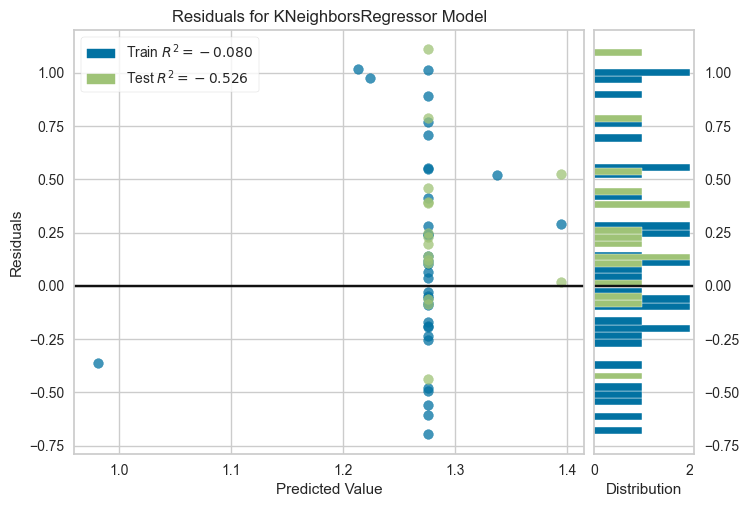

In [39]:
caret_reg.plot_model(best, plot = 'residuals')

In [40]:
gbr = caret_reg.compare_models(include = ['gbr'])

In [41]:
caret_reg.evaluate_model(gbr)

Parameters
alpha                              0.9
ccp_alpha                          0.0
criterion                 friedman_mse
init                              None
learning_rate                      0.1
loss                                ls
max_depth                            3
max_features                      None
max_leaf_nodes                    None
min_impurity_decrease              0.0
min_impurity_split                None
min_samples_leaf                     1
min_samples_split                    2
min_weight_fraction_leaf           0.0
n_estimators                       100
n_iter_no_change                  None
presort                     deprecated
random_state                      7313
subsample                          1.0
tol                             0.0001
validation_fraction                0.1
verbose                              0
warm_start                       False

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

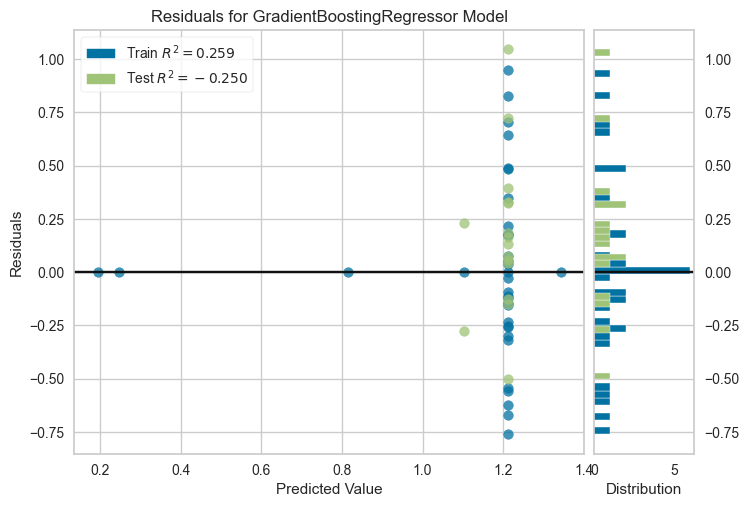

In [42]:
caret_reg.plot_model(gbr, plot = 'residuals')

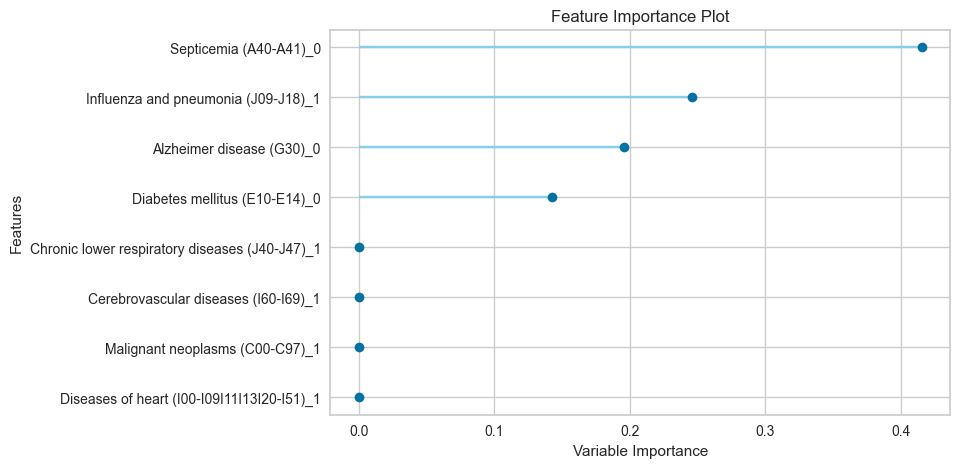

In [49]:
caret_reg.plot_model(gbr, plot = 'feature')

#### we conclude that this kind of model formulation does not work! we are going to use the death ratios in the next step

In [50]:
covid_start_oh.head()

state  Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0     Alabama                                            1   
1      Alaska                                            1   
2     Arizona                                            1   
3    Arkansas                                            1   
4  California                                            1   

   Malignant neoplasms (C00-C97)  \
0                              1   
1                              1   
2                              1   
3                              1   
4                              1   

   Chronic lower respiratory diseases (J40-J47)  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   Cerebrovascular diseases (I60-I69)  Alzheimer disease (G30)  \
0                                   1                        1   
1                                   1                        0   
2                                   1                        1   
3                                   1                        1   
4                                   1                        1   

   Septicemia (A40-A41)  Diabetes mellitus (E10-E14)  \
0                     0                            0   
1                     1                            0   
2                     0                            0   
3                     0                            0   
4                     0                            0   

   Influenza and pneumonia (J09-J18)  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                  0.001365   
1                                  0.000247   
2                                  0.001339   
3                                  0.001360   
4                                  0.000884   

   COVID-19 (U071, Underlying Cause of Death)  
0                                    0.001275  
1                                    0.000195  
2                                    0.001232  
3                                    0.001195  
4                                    0.000827

In [51]:
d_Cause_ratios_2019.head()

Jurisdiction of Occurrence  Septicemia (A40-A41)  \
0                    Alabama              0.000208   
1                     Alaska              0.000000   
2                    Arizona              0.000028   
3                   Arkansas              0.000083   
4                 California              0.000038   

   Malignant neoplasms (C00-C97)  Diabetes mellitus (E10-E14)  \
0                       0.002089                     0.000243   
1                       0.001232                     0.000000   
2                       0.001720                     0.000294   
3                       0.002158                     0.000340   
4                       0.001522                     0.000234   

   Alzheimer disease (G30)  Influenza and pneumonia (J09-J18)  \
0                 0.000486                           0.000216   
1                 0.000000                           0.000000   
2                 0.000422                           0.000119   
3                 0.000472                           0.000176   
4                 0.000395                           0.000157   

   Chronic lower respiratory diseases (J40-J47)  \
0                                      0.000682   
1                                      0.000012   
2                                      0.000532   
3                                      0.000765   
4                                      0.000344   

   Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)  \
0                                           0.000180                    
1                                           0.000000                    
2                                           0.000091                    
3                                           0.000049                    
4                                           0.000071                    

   Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)  \
0                                           0.000201                       
1                                           0.000000                       
2                                           0.000053                       
3                                           0.000203                       
4                                           0.000094                       

   Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)  \
0                                           0.000227                                                   
1                                           0.000000                                                   
2                                           0.000174                                                   
3                                           0.000022                                                   
4                                           0.000035                                                   

   Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0                                     0.002645   
1                                     0.001067   
2                                     0.001726   
3                                     0.002661   
4                                     0.001568   

   Cerebrovascular diseases (I60-I69)  \
0                            0.000588   
1                            0.000005   
2                            0.000372   
3                            0.000510   
4                            0.000400   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   COVID-19 (U071, Underlying Cause of Death)  
0                                         0.0  
1                                         0.0  
2                                         0.0  
3                                         0.

In [52]:
covid_start_ratios = covid_start_oh
covid_start_ratios[features] = d_Cause_ratios_2019 [features]
covid_start_ratios .loc[:, covid_start_ratios.columns != 'state'] = covid_start_ratios .loc[:, covid_start_ratios.columns != 'state'] * 1000 # converting ratios to "per 1000 population"
covid_start_ratios.head()

state  Diseases of heart (I00-I09,I11,I13,I20-I51)  \
0     Alabama                                     2.645321   
1      Alaska                                     1.067281   
2     Arizona                                     1.725933   
3    Arkansas                                     2.661376   
4  California                                     1.567774   

   Malignant neoplasms (C00-C97)  \
0                       2.089085   
1                       1.232273   
2                       1.719721   
3                       2.158453   
4                       1.521659   

   Chronic lower respiratory diseases (J40-J47)  \
0                                      0.681608   
1                                      0.011735   
2                                      0.532269   
3                                      0.765488   
4                                      0.343516   

   Cerebrovascular diseases (I60-I69)  Alzheimer disease (G30)  \
0                            0.587634                 0.486242   
1                            0.004527                 0.000000   
2                            0.372256                 0.422245   
3                            0.510494                 0.471708   
4                            0.399841                 0.395464   

   Septicemia (A40-A41)  Diabetes mellitus (E10-E14)  \
0              0.207753                     0.242680   
1              0.000000                     0.000000   
2              0.028486                     0.294234   
3              0.083386                     0.339679   
4              0.037583                     0.234090   

   Influenza and pneumonia (J09-J18)  \
0                           0.216043   
1                           0.000000   
2                           0.118915   
3                           0.175887   
4                           0.157392   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                  1.365370   
1                                  0.246799   
2                                  1.338880   
3                                  1.360441   
4                                  0.884410   

   COVID-19 (U071, Underlying Cause of Death)  
0                                    1.275009  
1                                    0.194985  
2                                    1.231909  
3                                    1.195408  
4                                    0.826719

In [53]:
covid_start_ratios.to_csv('covid_numerical.csv')

In [54]:
df1 = covid_start_ratios.drop(['state','COVID-19 (U071, Underlying Cause of Death)'], axis = 1)
df2 = covid_start_ratios.drop(['state','COVID-19 (U071, Multiple Cause of Death)'], axis = 1)

In [55]:
df1 = df1.rename(columns = {'COVID-19 (U071, Multiple Cause of Death)':'COVID_19_1',
                           'Diseases of heart (I00-I09,I11,I13,I20-I51)':'d_of_heart',
                            'Malignant neoplasms (C00-C97)':'m_neoplasms',
                            'Chronic lower respiratory diseases (J40-J47)':'ch_low_resp',
                            'Cerebrovascular diseases (I60-I69)':'cerebvasc_d',
                            'Alzheimer disease (G30)':'alzheimer',
                            'Septicemia (A40-A41)':'septicemia',
                            'Diabetes mellitus (E10-E14)':'diabetes',
                            'Influenza and pneumonia (J09-J18)':'influenza'})
df1.head()
                 

d_of_heart  m_neoplasms  ch_low_resp  cerebvasc_d  alzheimer  septicemia  \
0    2.645321     2.089085     0.681608     0.587634   0.486242    0.207753   
1    1.067281     1.232273     0.011735     0.004527   0.000000    0.000000   
2    1.725933     1.719721     0.532269     0.372256   0.422245    0.028486   
3    2.661376     2.158453     0.765488     0.510494   0.471708    0.083386   
4    1.567774     1.521659     0.343516     0.399841   0.395464    0.037583   

   diabetes  influenza  COVID_19_1  
0  0.242680   0.216043    1.365370  
1  0.000000   0.000000    0.246799  
2  0.294234   0.118915    1.338880  
3  0.339679   0.175887    1.360441  
4  0.234090   0.157392    0.884410

In [56]:
df2 = df2.rename(columns = {'COVID-19 (U071, Underlying Cause of Death)':'COVID_19_2',
                           'Diseases of heart (I00-I09,I11,I13,I20-I51)':'d_of_heart',
                            'Malignant neoplasms (C00-C97)':'m_neoplasms',
                            'Chronic lower respiratory diseases (J40-J47)':'ch_low_resp',
                            'Cerebrovascular diseases (I60-I69)':'cerebvasc_d',
                            'Alzheimer disease (G30)':'alzheimer',
                            'Septicemia (A40-A41)':'septicemia',
                            'Diabetes mellitus (E10-E14)':'diabetes',
                            'Influenza and pneumonia (J09-J18)':'influenza'})
df2.head()


d_of_heart  m_neoplasms  ch_low_resp  cerebvasc_d  alzheimer  septicemia  \
0    2.645321     2.089085     0.681608     0.587634   0.486242    0.207753   
1    1.067281     1.232273     0.011735     0.004527   0.000000    0.000000   
2    1.725933     1.719721     0.532269     0.372256   0.422245    0.028486   
3    2.661376     2.158453     0.765488     0.510494   0.471708    0.083386   
4    1.567774     1.521659     0.343516     0.399841   0.395464    0.037583   

   diabetes  influenza  COVID_19_2  
0  0.242680   0.216043    1.275009  
1  0.000000   0.000000    0.194985  
2  0.294234   0.118915    1.231909  
3  0.339679   0.175887    1.195408  
4  0.234090   0.157392    0.826719

In [57]:
s = caret_reg.setup(data = df1, 
                    normalize = True,
                    target = 'COVID_19_1',session_id=1000)

In [58]:
best = caret_reg.compare_models()

In [59]:
print(best)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1000, splitter='best')


In [60]:
caret_reg.evaluate_model(best)

Parameters
ccp_alpha                        0.0
criterion                        mse
max_depth                       None
max_features                    None
max_leaf_nodes                  None
min_impurity_decrease            0.0
min_impurity_split              None
min_samples_leaf                   1
min_samples_split                  2
min_weight_fraction_leaf         0.0
presort                   deprecated
random_state                    1000
splitter                        best

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

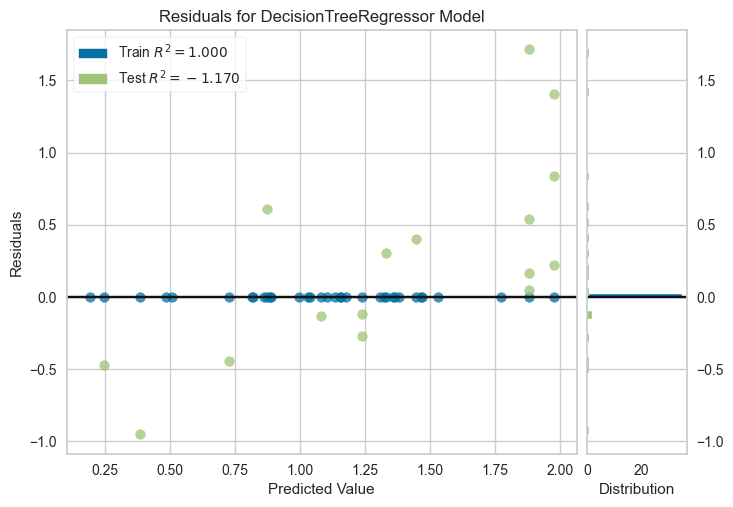

In [61]:
caret_reg.plot_model(best, plot = 'residuals')

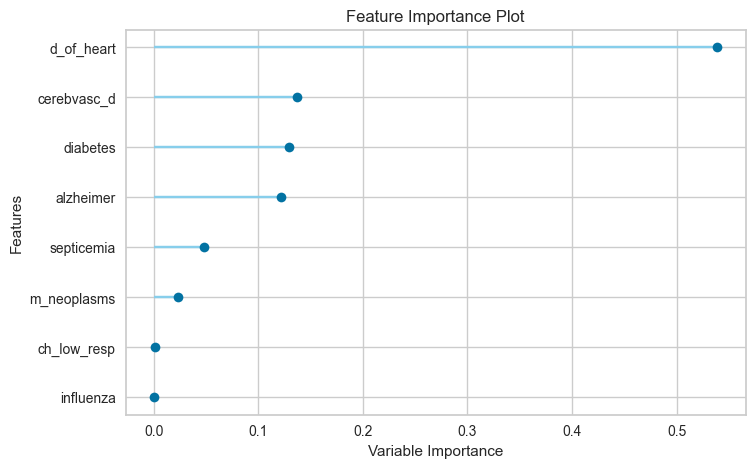

In [62]:
caret_reg.plot_model(best, plot = 'feature')

In [63]:
random_state=1000
dt = caret_reg.create_model('dt')

In [64]:
random_state=1000
tuned_dt = caret_reg.tune_model(dt)

In [65]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=14,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.02, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1000, splitter='best')


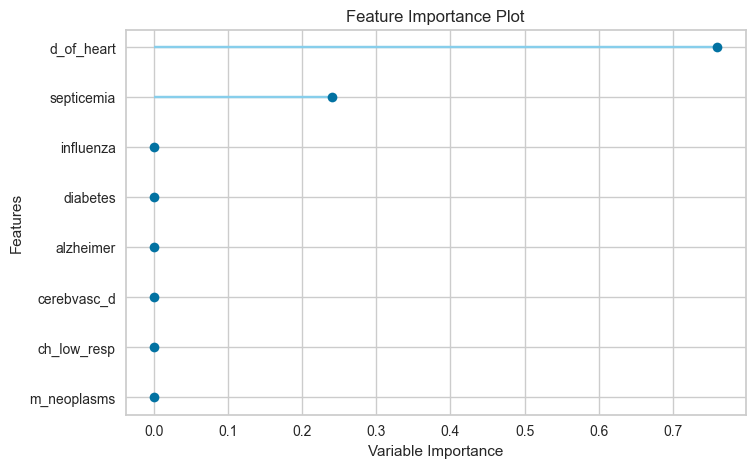

In [66]:
random_state=1000
caret_reg.plot_model(tuned_dt, plot='feature')

In [67]:
# An overall correlation matrix for different causes
corr = covid_start_ratios.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
#setting background
sns.set(style = 'white', font_scale =2)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

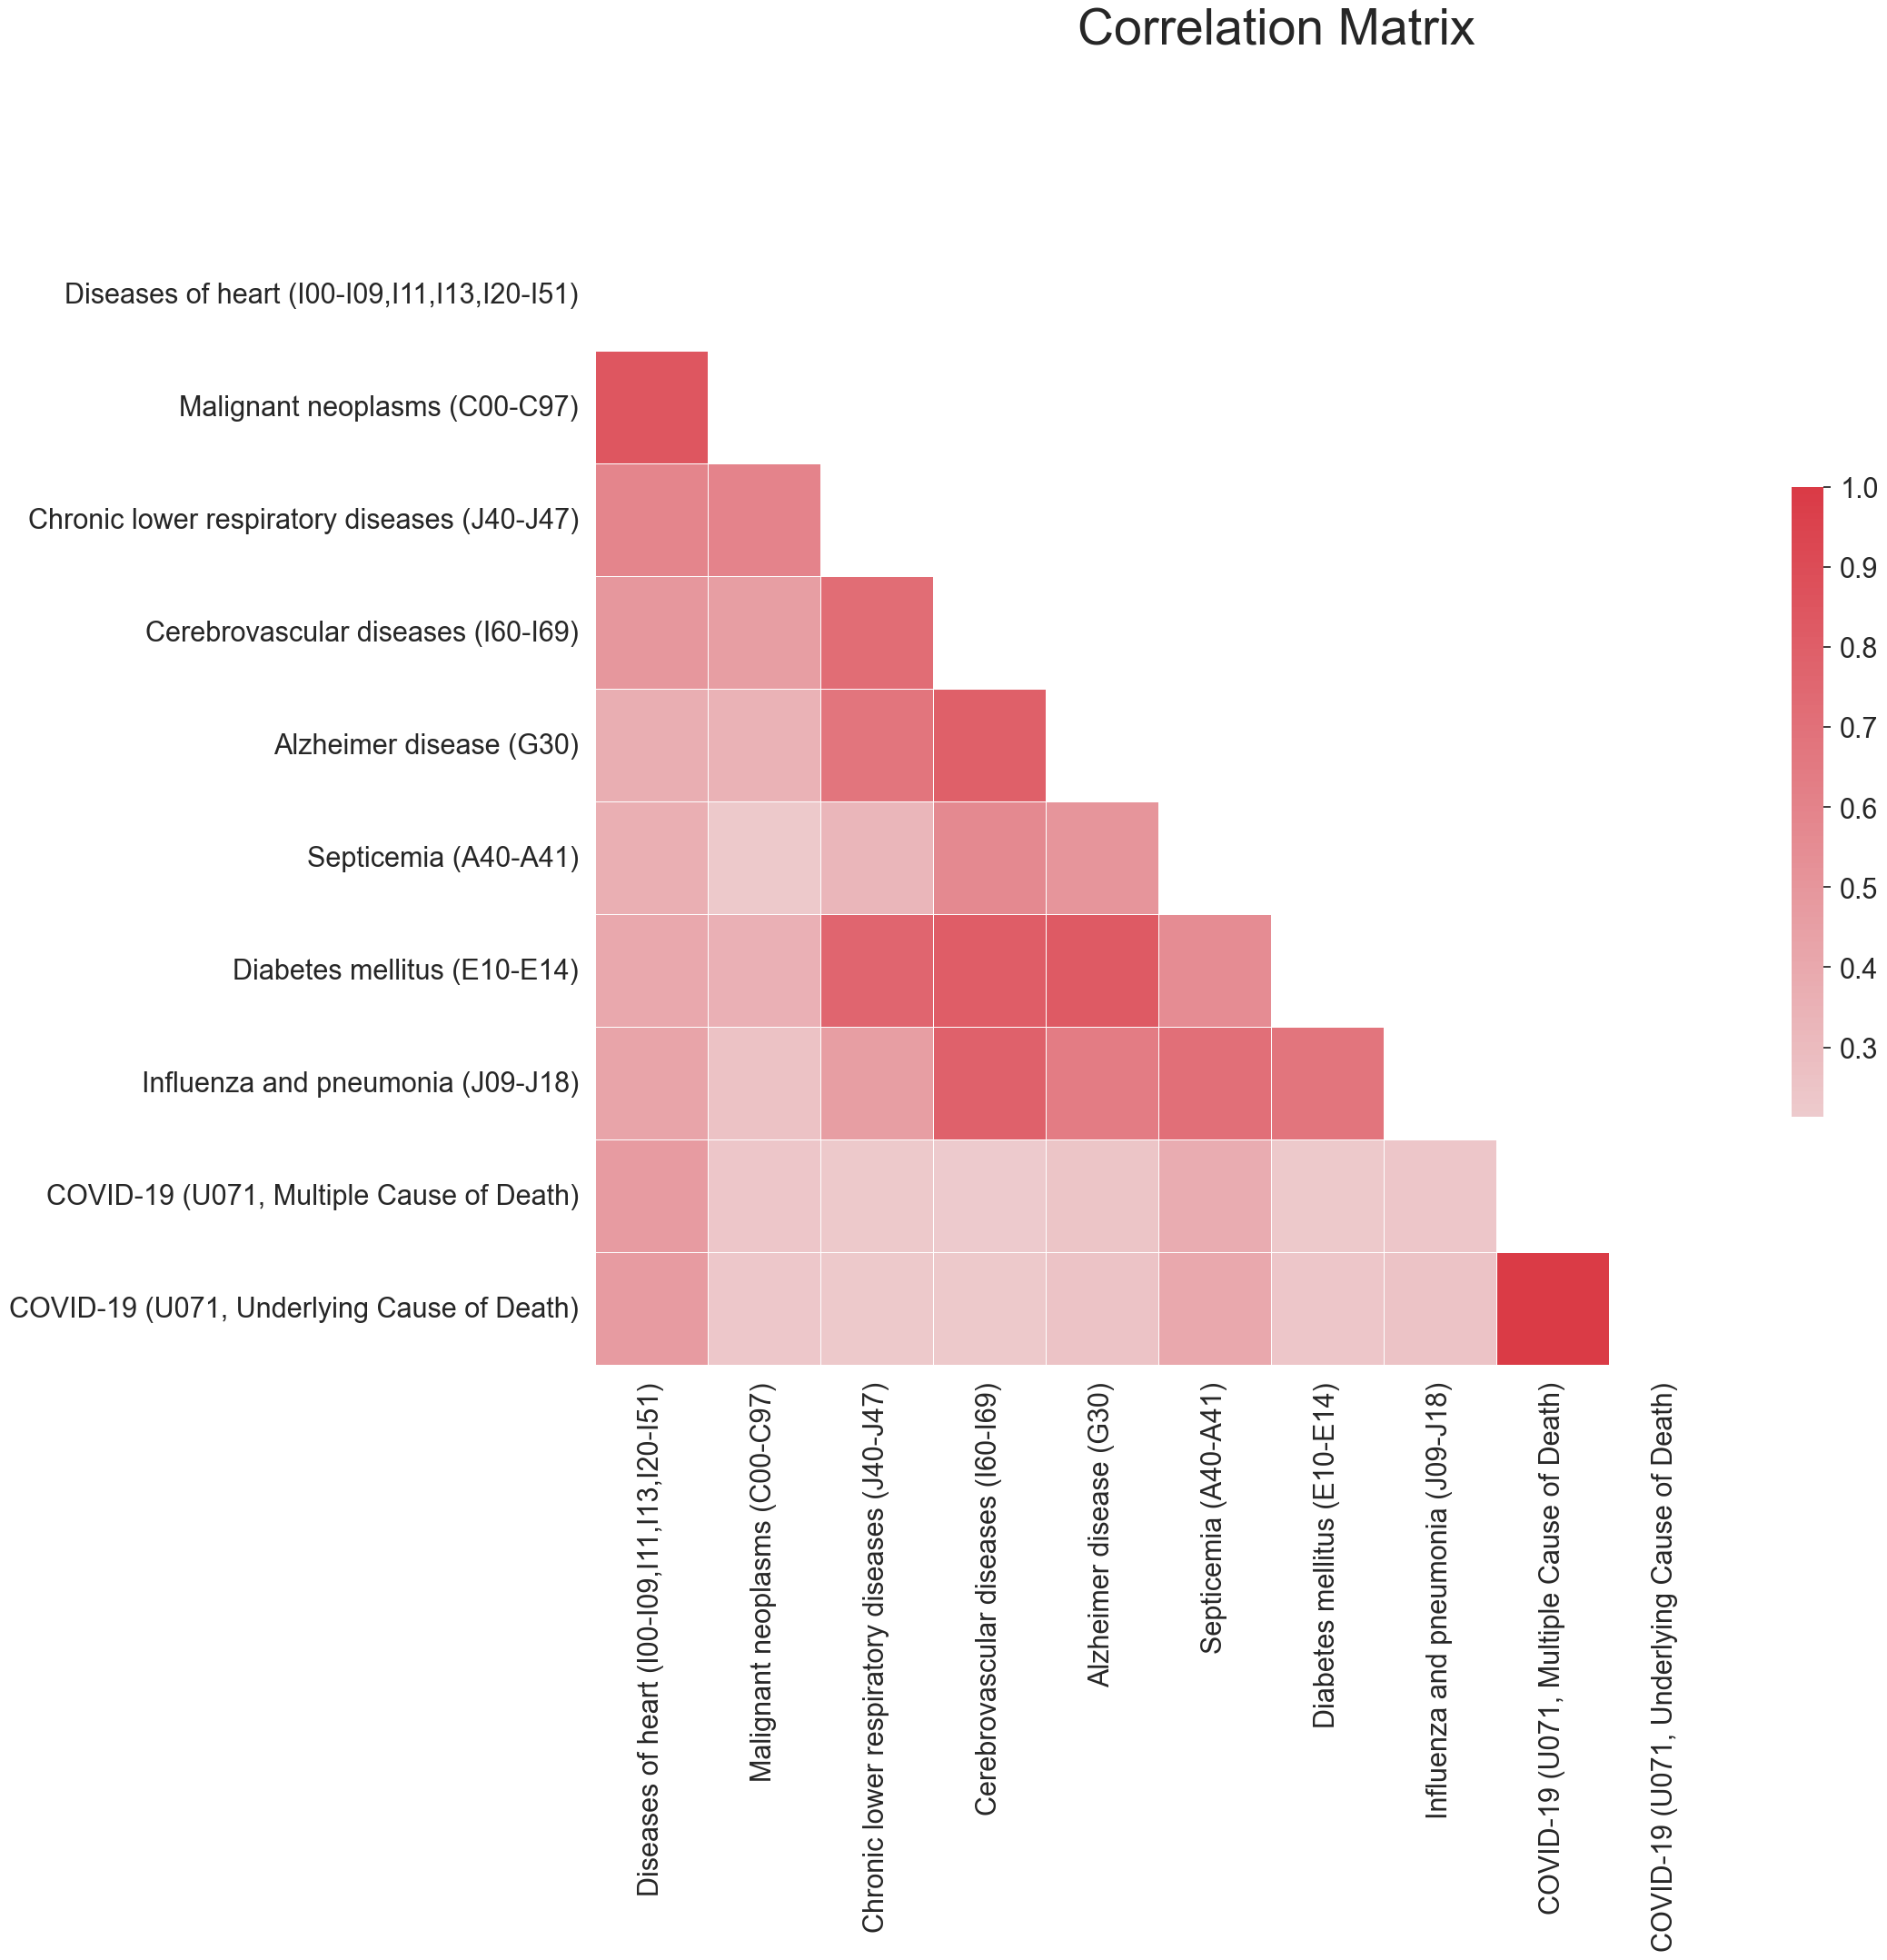

In [68]:
# Visualisation of correlation matrix
f, ax = plt.subplots(figsize=(20, 18))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [69]:
covid_start.head()

Jurisdiction of Occurrence                                     first_dc  \
0                    Alabama  Diseases of heart (I00-I09,I11,I13,I20-I51)   
1                     Alaska                Malignant neoplasms (C00-C97)   
2                    Arizona  Diseases of heart (I00-I09,I11,I13,I20-I51)   
3                   Arkansas  Diseases of heart (I00-I09,I11,I13,I20-I51)   
4                 California  Diseases of heart (I00-I09,I11,I13,I20-I51)   

                                     second_dc  \
0                Malignant neoplasms (C00-C97)   
1  Diseases of heart (I00-I09,I11,I13,I20-I51)   
2                Malignant neoplasms (C00-C97)   
3                Malignant neoplasms (C00-C97)   
4                Malignant neoplasms (C00-C97)   

                                       third_dc  \
0  Chronic lower respiratory diseases (J40-J47)   
1  Chronic lower respiratory diseases (J40-J47)   
2  Chronic lower respiratory diseases (J40-J47)   
3  Chronic lower respiratory diseases (J40-J47)   
4            Cerebrovascular diseases (I60-I69)   

                            fourth_dc  \
0  Cerebrovascular diseases (I60-I69)   
1  Cerebrovascular diseases (I60-I69)   
2             Alzheimer disease (G30)   
3  Cerebrovascular diseases (I60-I69)   
4             Alzheimer disease (G30)   

                                       fifth_dc  \
0                       Alzheimer disease (G30)   
1                          Septicemia (A40-A41)   
2            Cerebrovascular diseases (I60-I69)   
3                       Alzheimer disease (G30)   
4  Chronic lower respiratory diseases (J40-J47)   

   COVID-19 (U071, Multiple Cause of Death)  \
0                                  0.001365   
1                                  0.000247   
2                                  0.001339   
3                                  0.001360   
4                                  0.000884   

   COVID-19 (U071, Underlying Cause of Death)  
0                                    0.001275  
1                                    0.000195  
2                                    0.001232  
3                                    0.001195  
4                                    0.000827

In [70]:
# Testing the third cause of death
# Dropping the first two columns
covid_start_3rd = covid_start[covid_start['first_dc'] == 'Diseases of heart (I00-I09,I11,I13,I20-I51)']
covid_start_3rd = covid_start_3rd.drop(['first_dc','second_dc','fourth_dc','fifth_dc'], axis = 1)
covid_start_3rd.shape

(38, 4)

In [71]:
# 38 states have diseases of heart as their first cause of death
unique_3rd = pd.unique(covid_start_3rd['third_dc'].values.ravel()).tolist()
unique_3rd

['Chronic lower respiratory diseases (J40-J47)',
 'Cerebrovascular diseases (I60-I69)']

In [75]:
# there are 2 unique values for the third cause of death
# boxplot of these causes
fig3 = px.box(covid_start_3rd, covid_start_3rd['third_dc'], y = covid_start_3rd['COVID-19 (U071, Multiple Cause of Death)'],
      color = "third_dc", color_discrete_sequence = ["#ffc857", "#177e89"], 
      title = 'Means of COVID19(Multiple Cause of Death) death ratios for <br>the third death causes',
      labels = {'third_dc':'Third death causes',
               'COVID-19 (U071, Multiple Cause of Death)': 'Mean of the death ratios'})
fig3.update_layout(showlegend=False, height=500, width=700)

In [78]:
fig4 =px.box(covid_start_3rd, covid_start_3rd['third_dc'], y = covid_start_3rd['COVID-19 (U071, Underlying Cause of Death)'],
       color = "third_dc", color_discrete_sequence = ["#ffc857", "#177e89"],
      title = 'Means of COVID-19 (U071, Underlying Cause of Death) death ratios for <br>the third death causes',
      labels = {'third_dc':'Third death causes',
               'COVID-19 (U071, Underlying Cause of Death)': 'Mean of the death ratios'})
fig4.update_layout(showlegend=False, height=500, width=700)

In [79]:
covid_start_3rd['third_dc'].value_counts()

Chronic lower respiratory diseases (J40-J47)    26
Cerebrovascular diseases (I60-I69)              12
Name: third_dc, dtype: int64

In [80]:
# Hypotheses testig
# H0: There is no difference in the means
# H1: There is a difference in means
# create two new variables for the COVID-19 (U071, Multiple Cause of Death) from each state's third cause of death
Chronic_lower_respiratory_diseases = pd.DataFrame(covid_start.loc[covid_start['third_dc'] ==
                                                 'Chronic lower respiratory diseases (J40-J47)']['COVID-19 (U071, Underlying Cause of Death)'])
Cerebrovascular_diseases = pd.DataFrame(covid_start.loc[covid_start['third_dc'] ==
                                                   'Cerebrovascular diseases (I60-I69)']['COVID-19 (U071, Underlying Cause of Death)'])

print('Two-sided:\n', stats.ttest_ind(Chronic_lower_respiratory_diseases,
                                      Cerebrovascular_diseases, equal_var = True))

Two-sided:
 Ttest_indResult(statistic=array([-0.34385364]), pvalue=array([0.73245812]))


In [81]:
Chronic_lower_respiratory_diseases = pd.DataFrame(covid_start.loc[covid_start['third_dc'] ==
                                                 'Chronic lower respiratory diseases (J40-J47)']['COVID-19 (U071, Multiple Cause of Death)'])
Cerebrovascular_diseases = pd.DataFrame(covid_start.loc[covid_start['third_dc'] ==
                                                   'Cerebrovascular diseases (I60-I69)']['COVID-19 (U071, Multiple Cause of Death)'])

print('Two-sided:\n', stats.ttest_ind(Chronic_lower_respiratory_diseases,
                                      Cerebrovascular_diseases, equal_var = True))

Two-sided:
 Ttest_indResult(statistic=array([-0.28025346]), pvalue=array([0.78048737]))
